In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1 The Data

In [3]:
data, flux = np.loadtxt("comp_proj_data.csv", skiprows = 1, delimiter = ',', unpack = True)


In [4]:
energy = np.arange(0, 10, 0.05)
energy_midpoints = np.arange(0.025,10,0.05)
print(energy_midpoints)
print(len(energy_midpoints))

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275 2.325 2.375
 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825 2.875 2.925 2.975
 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425 3.475 3.525 3.575
 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025 4.075 4.125 4.175
 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625 4.675 4.725 4.775
 4.825 4.875 4.925 4.975 5.025 5.075 5.125 5.175 5.225 5.275 5.325 5.375
 5.425 5.475 5.525 5.575 5.625 5.675 5.725 5.775 5.825 5.875 5.925 5.975
 6.025 6.075 6.125 6.175 6.225 6.275 6.325 6.375 6.425 6.475 6.525 6.575
 6.625 6.675 6.725 6.775 6.825 6.875 6.925 6.975 7.025 7.075 7.125 7.175
 7.225 7.275 7.325 7.375 7.425 7.475 7.525 7.575 7.625 7.675 7.725 7.775
 7.825 7.875 7.925 7.975 8.025 8.075 8.125 8.175 8.

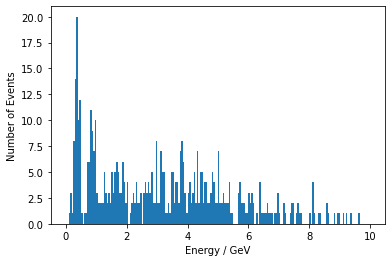

In [5]:
#%matplotlib tk 

plt.bar(energy_midpoints, data, 0.05)
plt.ylabel('Number of Events')
plt.xlabel('Energy / GeV')
plt.show()


## 3.2 Fit Function

In [6]:
def oscillation_probability(energy, theta_23 = np.pi/4, delta_m2_23 = 2.3e-3, L = 295):
  left = (np.sin(2 * theta_23)) ** 2
  right = (np.sin((1.267 * delta_m2_23 * L) / energy)) ** 2
  return 1 - (left * right)


In [7]:
def plot_oscillation_probability(energy, n = 4, delta_m = 2.4e-3):
  plt.plot(energy,oscillation_probability(energy_midpoints, theta_23= np.pi / n, delta_m2_23= delta_m))
  plt.xlabel('Probability')
  plt.ylabel('Energy / GeV')
  plt.title('Parameters theta = pi / ' + str(n) + ' and delta_m= ' + str(delta_m))

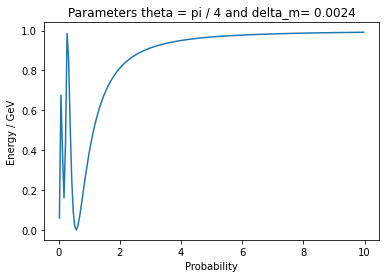

In [8]:
plot_oscillation_probability(energy_midpoints, 4, 2.4e-3)

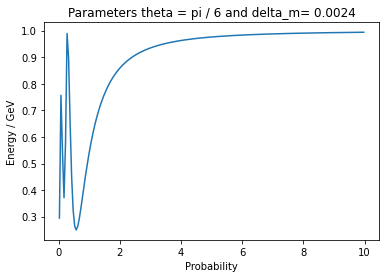

In [9]:
plot_oscillation_probability(energy_midpoints, n = 6, delta_m = 2.4e-3)

as n (pi / n) increases amplitude decreases and as delta_m decreases frequency increases

## flux x prob

In [36]:
def event_prediction(energy_midpoints, n = 4, delta_m = 2.4e-3, plot = False):
  probability_times_simulated = oscillation_probability(energy_midpoints, theta_23= np.pi * n, delta_m2_23= delta_m) * flux
  if plot == True:  
    plt.bar(energy_midpoints, probability_times_simulated, 0.05)
    plt.ylabel('Event rate prediction')
    plt.xlabel('Energy / GeV')
    plt.title('theta_n = ' + str(n) + ' delta_m = ' + str(delta_m))
    plt.show()
  return probability_times_simulated

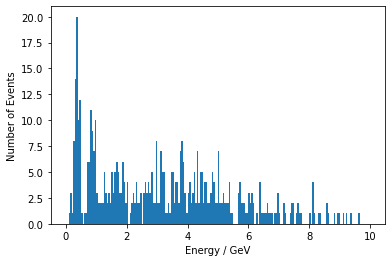

In [15]:
plt.bar(energy_midpoints, data, 0.05)
plt.ylabel('Number of Events')
plt.xlabel('Energy / GeV')
plt.show()

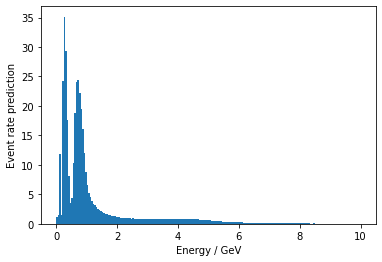

In [17]:
event_prediction(energy_midpoints,1/4.5,2.1e-3)

## 3.3 Likelihood Function

In [92]:
def likelihood_function(lambda_i, observed_number_i):
  sum = 0
  for n in range(0, len(lambda_i)):
    #print(n)
    one_term = lambda_i[n] - (observed_number_i[n] * np.log(lambda_i[n])) + (np.log(np.math.factorial(int(observed_number_i[n]))))
    sum += one_term
    #print(one_term)
  return sum

In [93]:
def plot_NLL(energy_midpoints,data, end_point = 2, interval = 0.01):
  n_thetas = np.arange(0,end_point, interval)
  NLL = []

  for n in n_thetas:
    expected_number_of_events = event_prediction(energy_midpoints,n,2.1e-3)
    NLL.append(likelihood_function(expected_number_of_events,data))

  plt.ylabel('NLL')
  plt.xlabel('n * theta')
  plt.plot(n_thetas,NLL,'x')
  return NLL, n_thetas

([1486.7359242435334,
  1483.1281884847665,
  1472.3679758182996,
  1454.6432516202206,
  1430.263911568463,
  1399.6567635484614,
  1363.3586048823483,
  1322.0074949156544,
  1276.3323480586237,
  1227.1409950078207,
  1175.3068798511813,
  1121.7545782457837,
  1067.4443377015696,
  1013.3558572991336,
  960.4715451926672,
  909.759525969714,
  862.1567302323708,
  818.5525082466137,
  779.7734026103534,
  746.5700407893027,
  719.607623425968,
  699.4620238404799,
  686.620565467066,
  681.4381725673569,
  683.4832773476896,
  687.0684528796858,
  683.4832773476896,
  681.4381725673569,
  686.620565467066,
  699.4620238404798,
  719.6076234259679,
  746.5700407893027,
  779.7734026103536,
  818.5525082466139,
  862.1567302323708,
  909.7595259697138,
  960.4715451926672,
  1013.3558572991336,
  1067.444337701569,
  1121.7545782457835,
  1175.306879851181,
  1227.1409950078207,
  1276.3323480586232,
  1322.0074949156544,
  1363.358604882348,
  1399.656763548461,
  1430.263911568463,

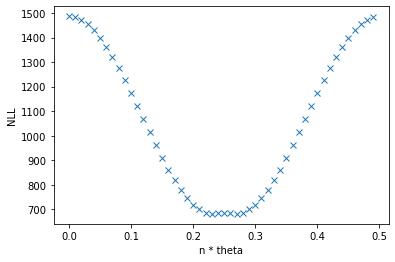

In [94]:
plot_NLL(energy_midpoints, data, end_point= 0.5)